In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
import matplotlib.pyplot as plt
import keras
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.callbacks import ReduceLROnPlateau

In [ ]:
#load the data set
fashion_mnist = keras.datasets.fashion_mnist

#Split the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#name of images
class_names = ['T-shirt', 'trousers', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# reshaping
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Performing one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
classifier = Sequential()

classifier.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
classifier.add(MaxPooling2D(pool_size=2))
classifier.add(Dropout(0.3))

classifier.add(Flatten())
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(10, activation='softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fit the model
history = classifier.fit(x_train, y_train,
          batch_size=86,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/100
698/698 [==============================] - 71s 102ms/step - loss: 0.4878 - accuracy: 0.8274 - val_loss: 0.3406 - val_accuracy: 0.8761
Epoch 2/100
698/698 [==============================] - 55s 79ms/step - loss: 0.3334 - accuracy: 0.8800 - val_loss: 0.2946 - val_accuracy: 0.8927
Epoch 3/100
698/698 [==============================] - 59s 84ms/step - loss: 0.2955 - accuracy: 0.8932 - val_loss: 0.2784 - val_accuracy: 0.8977
Epoch 4/100
698/698 [==============================] - 63s 90ms/step - loss: 0.2737 - accuracy: 0.8994 - val_loss: 0.2671 - val_accuracy: 0.9012
Epoch 5/100
698/698 [==============================] - 58s 84ms/step - loss: 0.2523 - accuracy: 0.9077 - val_loss: 0.2623 - val_accuracy: 0.9037
Epoch 6/100
698/698 [==============================] - 59s 85ms/step - loss: 0.2384 - accuracy: 0.9126 - val_loss: 0.2661 - val_accuracy: 0.9035
Epoch 7/100
698/698 [==============================] - 57s 81ms/step - loss: 0.2277 - accuracy: 0.9156 - val_loss: 0.2481 - val_a

698/698 [==============================] - 54s 77ms/step - loss: 0.0721 - accuracy: 0.9737 - val_loss: 0.3288 - val_accuracy: 0.9233
Epoch 58/100
698/698 [==============================] - 52s 75ms/step - loss: 0.0715 - accuracy: 0.9727 - val_loss: 0.3344 - val_accuracy: 0.9233
Epoch 59/100
698/698 [==============================] - 52s 74ms/step - loss: 0.0674 - accuracy: 0.9740 - val_loss: 0.3437 - val_accuracy: 0.9232
Epoch 60/100
698/698 [==============================] - 52s 75ms/step - loss: 0.0719 - accuracy: 0.9723 - val_loss: 0.3482 - val_accuracy: 0.9228
Epoch 61/100
698/698 [==============================] - 52s 75ms/step - loss: 0.0710 - accuracy: 0.9739 - val_loss: 0.3504 - val_accuracy: 0.9227
Epoch 62/100
698/698 [==============================] - 55s 79ms/step - loss: 0.0684 - accuracy: 0.9742 - val_loss: 0.3505 - val_accuracy: 0.9213
Epoch 63/100
698/698 [==============================] - 53s 76ms/step - loss: 0.0675 - accuracy: 0.9746 - val_loss: 0.3423 - val_accuracy

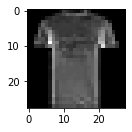

In [ ]:
plt.subplot(231)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#Predict the test results
rounded_predictions = classifier.predict_classes(x_test)
rounded_predictions[1]

y_test[1]
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

#confusion matrix and classification report
print('Confusion Matrix :\n',confusion_matrix(rounded_labels, rounded_predictions))
print('\n')
print('Classification Report :\n',classification_report(rounded_labels, rounded_predictions))
print('\n')
print('Accuracy : ' ,accuracy_score(rounded_labels, rounded_predictions)*100)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Confusion Matrix :
 [[890   0  15  18   3   1  69   0   4   0]
 [  0 982   1  11   3   0   1   0   2   0]
 [ 17   0 887  11  39   0  46   0   0   0]
 [ 12   4   8 935  23   0  17   0   1   0]
 [  1   1  77  24 858   0  38   0   1   0]
 [  0   0   0   0   0 975   0  18   0   7]
 [101   2  55  21  56   0 757   0   8   0]
 [  0   0   0   0   0   0   0 987   0  13]
 [  1   1   0   7   0   2   4   4 981   0]
 [  0   0   0   0   0   3   1  30   0 966]]


Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.85  

In [ ]:
loss, acc = classifier.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
classifier.save('classificationAvecMatrix.h5')

Accuracy: 0.922


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

batches = datagen.flow(x_train, y_train, batch_size=64)

In [ ]:
classifier.fit(batches, steps_per_epoch = len(x_train)//64, epochs=100,
                      use_multiprocessing=False)

Epoch 1/100
937/937 [==============================] - 91s 97ms/step - loss: 0.7185 - accuracy: 0.7437
Epoch 2/100
937/937 [==============================] - 86s 92ms/step - loss: 0.5857 - accuracy: 0.7839
Epoch 3/100
937/937 [==============================] - 84s 90ms/step - loss: 0.5468 - accuracy: 0.7981
Epoch 4/100
937/937 [==============================] - 59s 63ms/step - loss: 0.5286 - accuracy: 0.8043
Epoch 5/100
937/937 [==============================] - 59s 63ms/step - loss: 0.5066 - accuracy: 0.8105
Epoch 6/100
937/937 [==============================] - 55s 59ms/step - loss: 0.4942 - accuracy: 0.8158
Epoch 7/100
937/937 [==============================] - 59s 63ms/step - loss: 0.4811 - accuracy: 0.8218
Epoch 8/100
937/937 [==============================] - 56s 60ms/step - loss: 0.4708 - accuracy: 0.8251
Epoch 9/100
937/937 [==============================] - 57s 61ms/step - loss: 0.4674 - accuracy: 0.8256
Epoch 10/100
937/937 [==============================] - 56s 60ms/step - l

937/937 [==============================] - 57s 61ms/step - loss: 0.3665 - accuracy: 0.8649
Epoch 80/100
937/937 [==============================] - 54s 58ms/step - loss: 0.3640 - accuracy: 0.8657
Epoch 81/100
937/937 [==============================] - 60s 64ms/step - loss: 0.3654 - accuracy: 0.8659
Epoch 82/100
937/937 [==============================] - 58s 62ms/step - loss: 0.3658 - accuracy: 0.8646
Epoch 83/100
937/937 [==============================] - 55s 59ms/step - loss: 0.3678 - accuracy: 0.8638
Epoch 84/100
937/937 [==============================] - 54s 58ms/step - loss: 0.3675 - accuracy: 0.8634
Epoch 85/100
937/937 [==============================] - 59s 63ms/step - loss: 0.3621 - accuracy: 0.8648
Epoch 86/100
937/937 [==============================] - 55s 58ms/step - loss: 0.3623 - accuracy: 0.8648
Epoch 87/100
937/937 [==============================] - 60s 64ms/step - loss: 0.3619 - accuracy: 0.8655
Epoch 88/100
937/937 [==============================] - 58s 62ms/step - loss:

In [ ]:
loss, acc = classifier.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.900


In [ ]:
classifier.save('classifierAugmentationAvecMatrix.h5')

# TESTE 1 AVEC "LOAD_IMAGE"


In [ ]:
def plot_image(prediction, img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction,axis = -1)
    plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
               100*np.max(prediction),
               ),
                color="blue")
    
def plot_value_array(prediction):
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="red")
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction)
    thisplot[predicted_label].set_color('blue')

In [ ]:
# Function to load and prepare the image in right shape
def load_image(filename):
    # Load the image
    img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
    # Convert the image to array
    img = img_to_array(img)
    # Reshape the image into a sample of 1 channel
    img = img.reshape(1, 28, 28, 1)
    # Prepare it as pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# Load an image and predict the apparel class
img = load_image('./ClassificationDimagesPageWeb/static/images/basquette.jpg')
# Load the saved model
classifier = load_model('classificationAvecMatrix.h5')
# Predict the apparel class
class_prediction = classifier.predict_classes(img)
print(class_prediction[0])

#Map apparel category with the numerical class
if class_prediction[0] == 0:
  product = "T-shirt/top"
elif class_prediction[0] == 1:
  product = "Trouser"
elif class_prediction[0] == 2:
  product = "Pullover"
elif class_prediction[0] == 3:
  product = "Dress"
elif class_prediction[0] == 4:
  product = "Coat"
elif class_prediction[0] == 5:
  product = "Sandal"
elif class_prediction[0] == 6:
  product = "Shirt"
elif class_prediction[0] == 7:
  product = "Sneaker"
elif class_prediction[0] == 8:
  product = "Bag"
else:
  product = "Ankle boot"

print(product)


7
Sneaker


In [ ]:
preds = classifier.predict(img)

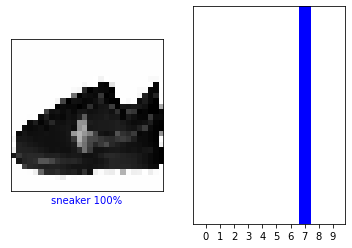

In [ ]:
for i in range(1):
    # image
    plt.subplot(1, 2, 2*i+1)
    plot_image(preds[i], img[i])
    # bar chart
    plt.subplot(1, 2, 2*i+2)
    plot_value_array(preds[i])
plt.show()